## Exploratory Data Analysis on the Netflix Users Dataset using Python

#### Dataset source: https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset

In [188]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [189]:
#Load the dataset
df = pd.read_csv('Netflix_Userbase.csv')  

In [190]:
# Display the first 10 rows of the DataFrame
df.head(10)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
5,6,Premium,15,18-03-22,27-06-23,France,29,Female,Smart TV,1 Month
6,7,Standard,12,09-12-21,25-06-23,Brazil,46,Male,Tablet,1 Month
7,8,Basic,10,02-04-23,24-06-23,Mexico,39,Female,Laptop,1 Month
8,9,Standard,12,20-10-22,23-06-23,Spain,37,Male,Smartphone,1 Month
9,10,Premium,15,07-01-23,22-06-23,Italy,44,Female,Smart TV,1 Month


In [191]:
#Information about the columns, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [192]:
# Summary statistics for numerical columns
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [193]:
 # Summary statistics for categorical columns
df.describe(include='object')

,Subscription Type,Join Date,Last Payment Date,Country,Gender,Device,Plan Duration
count,2500,2500,2500,2500,2500,2500,2500
unique,3,300,26,10,2,4,1
top,Basic,05-11-22,28-06-23,United States,Female,Laptop,1 Month
freq,999,33,164,451,1257,636,2500


In [194]:
#Number of rows and columns in the dataset
rows, columns = df.shape
print("No of Rows:", rows, "\nNo of Columns:", columns)

No of Rows: 2500 
No of Columns: 10


In [195]:
# Check for missing values
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

#### Since there are no missing values we won't be dropping any rows or columns.

In [196]:
# Convert Join Date and Last Payment Date to datetime
df['Join Date'] = pd.to_datetime(df['Join Date'])
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])

In [197]:
#Check if the data columns have changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


In [198]:
# Display the first rows of the DataFrame to check the date values in the columns
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month


### Plotting a histogram to understand membership durations in months

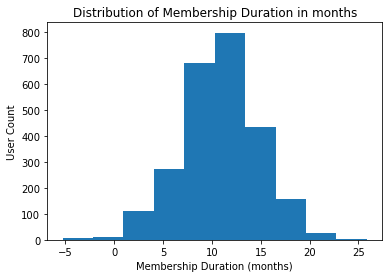

In [199]:
# Calculate the membership duration in months
df['Membership Duration'] = (df['Last Payment Date'] - df['Join Date']) / pd.Timedelta(days=30)

# Plot the distribution of membership duration in months
plt.hist(df['Membership Duration'], bins=10)
plt.xlabel('Membership Duration (months)')
plt.ylabel('User Count')
plt.title('Distribution of Membership Duration in months')
plt.show()

#### We can see that there are negative values for the duration which are possible outliers because the Last Payment date should be past the Join Date. Let's print the values of the Join Date and Last Payment dates to see how many outliers exist.

In [200]:
# Extract the 'Membership Duration' column as a numpy array
x = df['Membership Duration'].values

# Check for negative values
negative_values = np.where(x < 0)[0]

# Print the negative values
if len(negative_values) > 0:
    print("Negative values are")
    print(df[[ 'Join Date','Last Payment Date', 'Membership Duration']].iloc[negative_values])
else:
    print("No Negative values")

Negative values are
     Join Date Last Payment Date  Membership Duration
9   2023-07-01        2023-06-22            -0.300000
14  2023-09-05        2023-06-28            -2.300000
20  2023-10-06        2023-06-22            -3.533333
34  2023-11-04        2023-06-28            -4.300000
39  2023-07-03        2023-06-22            -0.366667
60  2023-08-02        2023-06-22            -1.366667
69  2023-08-05        2023-06-22            -1.466667
80  2023-11-01        2023-06-24            -4.333333
108 2023-08-02        2023-06-25            -1.266667
129 2023-07-01        2023-06-23            -0.266667
153 2023-11-03        2023-06-27            -4.300000
169 2023-12-01        2023-06-25            -5.300000
222 2023-08-01        2023-06-25            -1.233333


#### We will drop the outliers by dropping the rows that contain the outlier, as there are just few rows.

In [201]:
if len(negative_values) > 0:
    df = df.drop(index=df.index[negative_values])

#### Check if the outliers are removed and plot the histogram again.

In [202]:
# Print the negative values
if len(negative_values) < 0:
    print("Negative values are")
    print(df[[ 'Join Date','Last Payment Date', 'Membership Duration']].iloc[negative_values])
    
else:
    print("No Negative values")

No Negative values


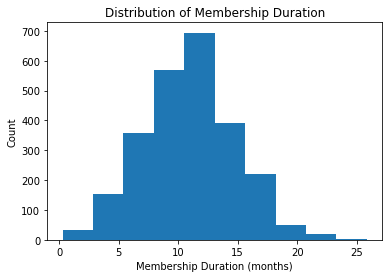

In [203]:
# Plot the distribution of membership duration in months
plt.hist(df['Membership Duration'], bins=10)
plt.xlabel('Membership Duration (months)')
plt.ylabel('Count')
plt.title('Distribution of Membership Duration')
plt.show()

### Analyzing the categorical variables using Seaborn's Count Plots

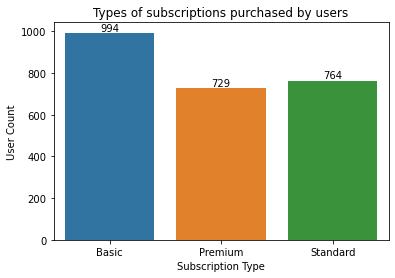

Percentage of each subscription type:
Basic       39.97
Standard    30.72
Premium     29.31
Name: Subscription Type, dtype: float64


In [204]:
# Count plot to count the users based on the Subscription Type
sb = sns.countplot(x='Subscription Type', data=df)
plt.xlabel('Subscription Type')
plt.ylabel('User Count')
plt.title('Types of subscriptions purchased by users')
# Add value labels to each bar
for p in sb.patches:
    sb.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

#Calculating the percentage for each subscription type purchased
total_users = len(df)
subscription_counts = df['Subscription Type'].value_counts()
subscription_percentages = ((subscription_counts / total_users) * 100).round(2)
print("Percentage of each subscription type:")
print(subscription_percentages)

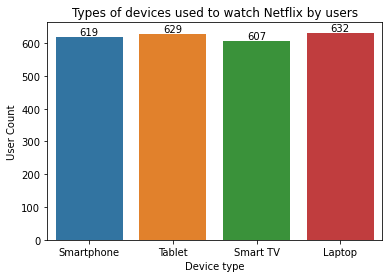

Percentage of each device type:
Laptop        25.41
Tablet        25.29
Smartphone    24.89
Smart TV      24.41
Name: Device, dtype: float64


In [205]:
# Count plot to count the users per the device used
dv = sns.countplot(x='Device', data=df)
plt.xlabel('Device type')
plt.ylabel('User Count')
plt.title('Types of devices used to watch Netflix by users')

# Add value labels to each bar
for p in dv.patches:
    dv.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

#Calculating the percentage for each device type used
device_counts = df['Device'].value_counts()
device_percentages = ((device_counts / total_users) * 100).round(2)
print("Percentage of each device type:")
print(device_percentages)

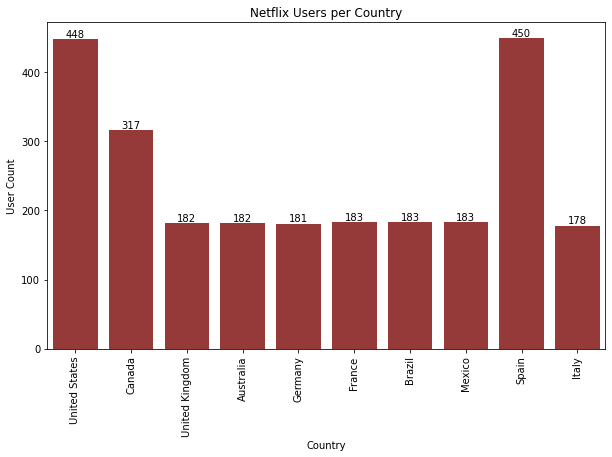

Percentage of users per country:
Spain             18.094
United States     18.014
Canada            12.746
France             7.358
Brazil             7.358
Mexico             7.358
Australia          7.318
United Kingdom     7.318
Germany            7.278
Italy              7.157
Name: Country, dtype: float64


In [206]:
# Count plot to count the users per country
plt.figure(figsize=(10, 6))
cn = sns.countplot(x='Country', data=df, color='brown')
plt.xlabel('Country')
plt.ylabel('User Count')
plt.title('Netflix Users per Country')
plt.xticks(rotation=90)

# Add value labels to each bar
for p in cn.patches:
    cn.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

#Calculating the percentage for users using Netflix per country
country_counts = df['Country'].value_counts()
country_percentages = ((country_counts / total_users) * 100).round(3)
print("Percentage of users per country:")
print(country_percentages)

### Box plot for Monthly Revenue by Age Groups and Gender

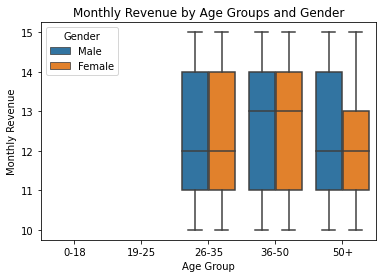

In [207]:
#Group ages into 5 different groups
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 25, 35, 50, 100], labels=['0-18', '19-25', '26-35', '36-50', '50+'])

#Plot the boxplot
sns.boxplot(x='Age Group', y='Monthly Revenue', hue='Gender', data=df)
plt.xlabel('Age Group')
plt.ylabel('Monthly Revenue')
plt.title('Monthly Revenue by Age Groups and Gender')
plt.show()

### Summary:

#### As per the above analysis,

#### •	The highest duration of membership purchased by users is in between 10-15 months.
#### •	The basic subscription type is the most purchased type of subscription by 39.97% of the users.
#### •	Laptops are the most used devices by 25.41% of the users.
#### •	Spain and United States are the top countries with highest number of users watching Netflix with 18.09% and 18.01% respectively.
#### •	For the age groups 26-35 and 36-50, the monthly revenue for 50% of males and females is between 11 and 14. For the age group over 50+, the monthly revenue for 50% of males is between 11 and 14 and 50% females is between 11 and 13
